#**Stage 1 - Hakuna Matata Exploratory Data Analysis**

* Ahmad Faqih Ulumuddin
* Ana Azzahra
* Athiya Fathinati Anindya
* Esa Risa Rouli Sekar Andonowari
* Jerio Benediktus Rumagit
* Mutiara Citra Sari
* Nicken Shidqia Nurahman

**Dataset: [TravelInsurancePrediction.csv](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data?resource=download)**

**GitHub: [Hakuna Matata](https://github.com/Hakuna-Matata-Travel-Insurance/Final-Project.git)**


In [5]:
# Library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [6]:
url = 'https://raw.githubusercontent.com/Hakuna-Matata-Travel-Insurance/Final-Project/main/TravelInsurancePrediction.csv'
df = pd.read_csv(url)

## Statistik Deskriptif

In [7]:
# Cek tipe data dan nama kolom
print("A. Tipe data dan nama kolom:")
print(df.info())

A. Tipe data dan nama kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB
None


In [8]:
# Tampilkan 5 baris pertama data
df.head(6)

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   
5           5   25  Private Sector/Self Employed            No       1150000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0

In [9]:
# Cek summary statistics
print("\nC. Summary statistics:")
print(df.describe(include='all'))


C. Summary statistics:
         Unnamed: 0          Age               Employment Type GraduateOrNot  \
count   1987.000000  1987.000000                          1987          1987   
unique          NaN          NaN                             2             2   
top             NaN          NaN  Private Sector/Self Employed           Yes   
freq            NaN          NaN                          1417          1692   
mean     993.000000    29.650226                           NaN           NaN   
std      573.741812     2.913308                           NaN           NaN   
min        0.000000    25.000000                           NaN           NaN   
25%      496.500000    28.000000                           NaN           NaN   
50%      993.000000    29.000000                           NaN           NaN   
75%     1489.500000    32.000000                           NaN           NaN   
max     1986.000000    35.000000                           NaN           NaN   

        AnnualI

In [10]:
# Membagi data menjadi numerikal dan kategorikal
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')
num = numerical.columns
cat = categorical.columns

In [11]:
# Melihat frekuensi nilai tertinggi di setiap kolom kategori
freq_cat = df[cat].describe()

print(freq_cat)

                     Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607  


In [12]:
# Cek total unique value
dict = []
for i in df.columns:
    print(f'{i} = {df[i].nunique()}')

Unnamed: 0 = 1987
Age = 11
Employment Type = 2
GraduateOrNot = 2
AnnualIncome = 30
FamilyMembers = 8
ChronicDiseases = 2
FrequentFlyer = 2
EverTravelledAbroad = 2
TravelInsurance = 2


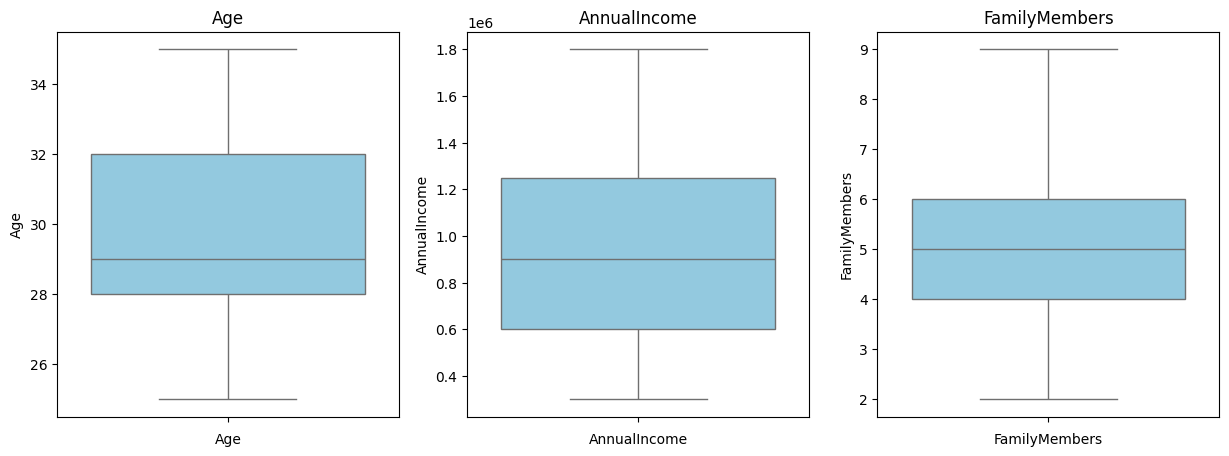

In [13]:
# Tentukan kolom yang ingin ditampilkan
kolom_nemerik = ['Age', 'AnnualIncome', 'FamilyMembers']

# Buat figure dan subplot
plt.figure(figsize=(15, 5))
for i, column in enumerate(kolom_nemerik, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[column], color='skyblue', orient='v')
    plt.title(f'{column}')
    plt.xlabel(column)

In [14]:
df2 = df.copy()

In [15]:
df2.head()

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

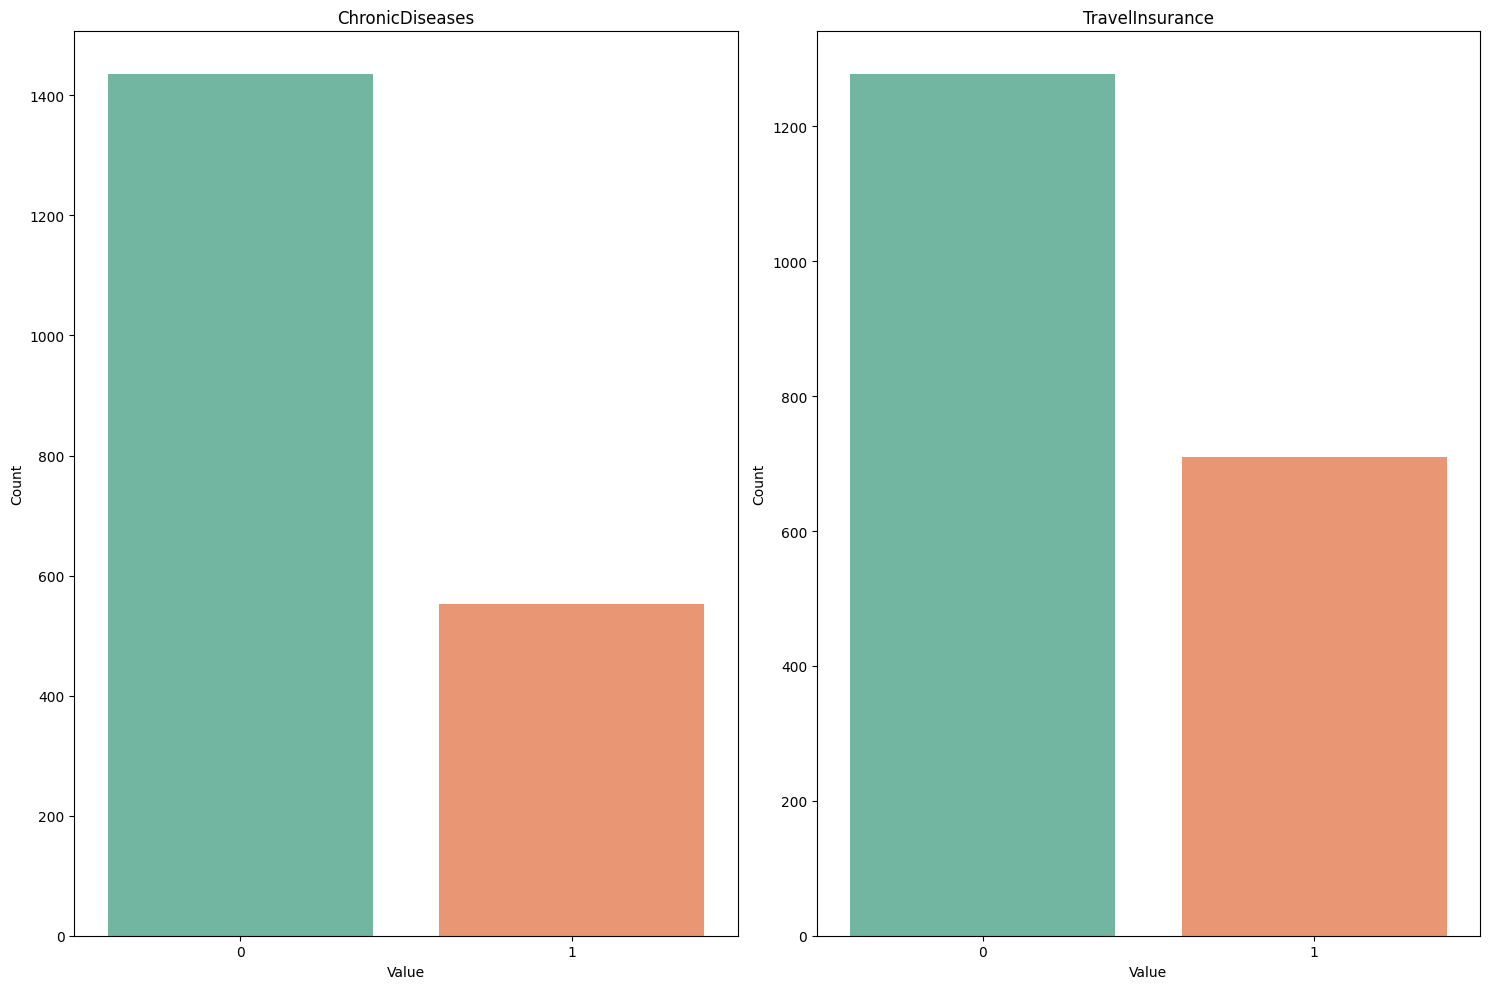

In [16]:
# Mendapatkan daftar kolom yang memiliki nilai numerik 1 dan 0
numeric_columns = df2.columns[df2.isin([0, 1]).all()]

# Buat subplot untuk menampilkan count plot
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 10))

# Tampilkan count plot untuk setiap kolom
for i, column in enumerate(numeric_columns):
    sns.countplot(data=df2, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
df2.describe()

Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

In [18]:
df2.describe(include=['object'])

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

Selisih mean dan mediannya kecil, sehingga kecil kemungkinan terjadinya anomali di antara masing-masing unique value

In [19]:
# Membagi data numerikal dan kategorikal
num = df2.select_dtypes(exclude='object')
cat = df2.select_dtypes(include='object')

# Kolom
numerical = num.columns
categorical = cat.columns

In [20]:
numerical

Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')

In [21]:
categorical

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [22]:
df2[numerical].describe().T

count           mean            std       min       25%  \
Unnamed: 0       1987.0     993.000000     573.741812       0.0     496.5   
Age              1987.0      29.650226       2.913308      25.0      28.0   
AnnualIncome     1987.0  932762.959235  376855.684748  300000.0  600000.0   
FamilyMembers    1987.0       4.752894       1.609650       2.0       4.0   
ChronicDiseases  1987.0       0.277806       0.448030       0.0       0.0   
TravelInsurance  1987.0       0.357323       0.479332       0.0       0.0   

                      50%        75%        max  
Unnamed: 0          993.0     1489.5     1986.0  
Age                  29.0       32.0       35.0  
AnnualIncome     900000.0  1250000.0  1800000.0  
FamilyMembers         5.0        6.0        9.0  
ChronicDiseases       0.0        1.0        1.0  
TravelInsurance       0.0        1.0        1.0

Semua kolom mempunyai sebaran data yang sama dan tidak ada perbedaan yang signifikan antara mean dan median, serta maxnya tidak terlalu timpang

In [23]:
df2[categorical].describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

In [24]:
df2[numerical].mode()

Unnamed: 0   Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
0              0  28.0      800000.0            4.0              0.0   
1              1   NaN           NaN            NaN              NaN   
2              2   NaN           NaN            NaN              NaN   
3              3   NaN           NaN            NaN              NaN   
4              4   NaN           NaN            NaN              NaN   
...          ...   ...           ...            ...              ...   
1982        1982   NaN           NaN            NaN              NaN   
1983        1983   NaN           NaN            NaN              NaN   
1984        1984   NaN           NaN            NaN              NaN   
1985        1985   NaN           NaN            NaN              NaN   
1986        1986   NaN           NaN            NaN              NaN   

      TravelInsurance  
0                 0.0  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1982              NaN  
1983              NaN  
1984              NaN  
1985              NaN  
1986              NaN  

[1987 rows x 6 columns]

In [25]:
# Persentasi Target
count_target = df2['TravelInsurance'].value_counts(normalize=True).mul(100).round(2)

count_target

0    64.27
1    35.73
Name: TravelInsurance, dtype: float64

### **Descriptive Statistics Insight**

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

* Kolom 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', dan 'TravelInsurance' adalah tipe data Boolean, jadi untuk keperluan EDA sebaiknya disamakan saja tipenya menjadi object atau integer agar mudah dikategorikan menjadi data numerikal dan kategorikal. Ini akan memudahkan pemahaman bahwa data numerikal adalah yang berisi angka (integer), dan data kategorikal berisi karakter/string (object).

* Kolom 'TravelInsurance' tidak diubah karena merupakan target dan nantinya dibutuhkan data numerikal saat modelling machine learning.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Tidak ada kolom yang memiliki nilai kosong dalam dataset ini.



C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

* Rentang umur pelanggan adalah 25-35, termasuk golongan usia produktif yang muda.

* Pelanggan didominasi oleh karyawan swasta dan wiraswasta, lulusan universitas, tidak mengidap penyakit kronis, tidak sering bepergian dengan pesawat dan belum pernah traveling keluar negeri.

* Pelanggan dengan frekuensi terbanyak berusia 28 tahun, dengan Pendapatan Tahunan 800.000, dan memiliki 4 Anggota Keluarga

* Pelanggan yang membeli asuransi perjalanan hanya 35,73%

## Analisis Univariat

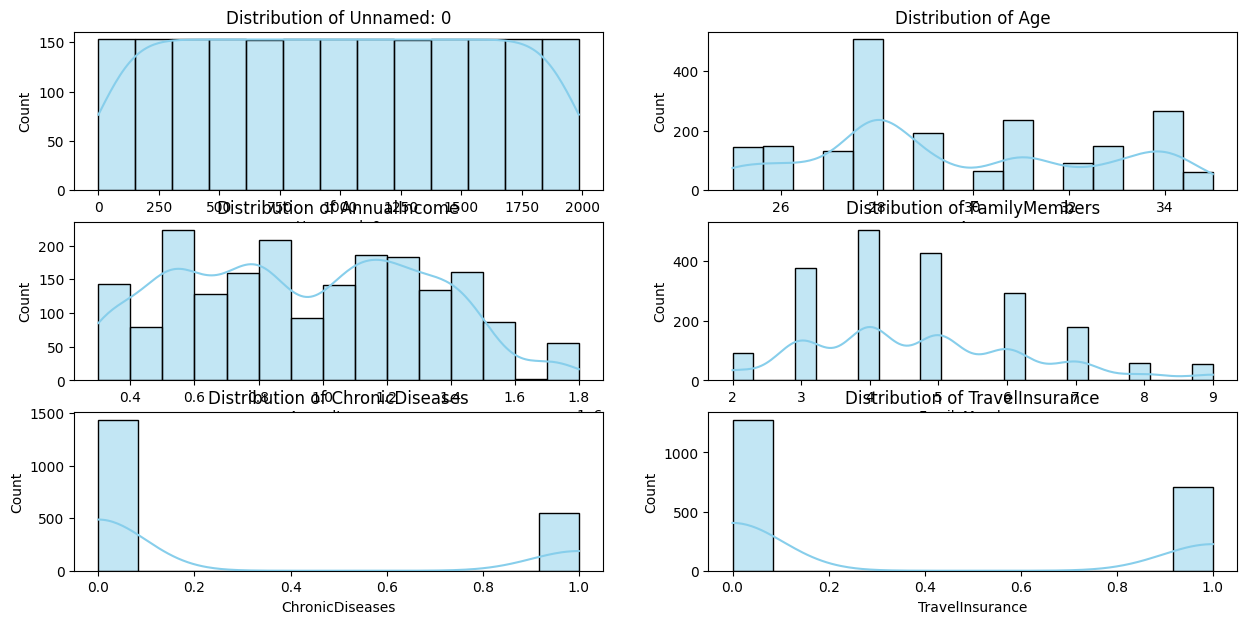

In [26]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Visualisasi distribusi masing-masing kolom numerik
numerical_columns = df.select_dtypes(include=['int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')

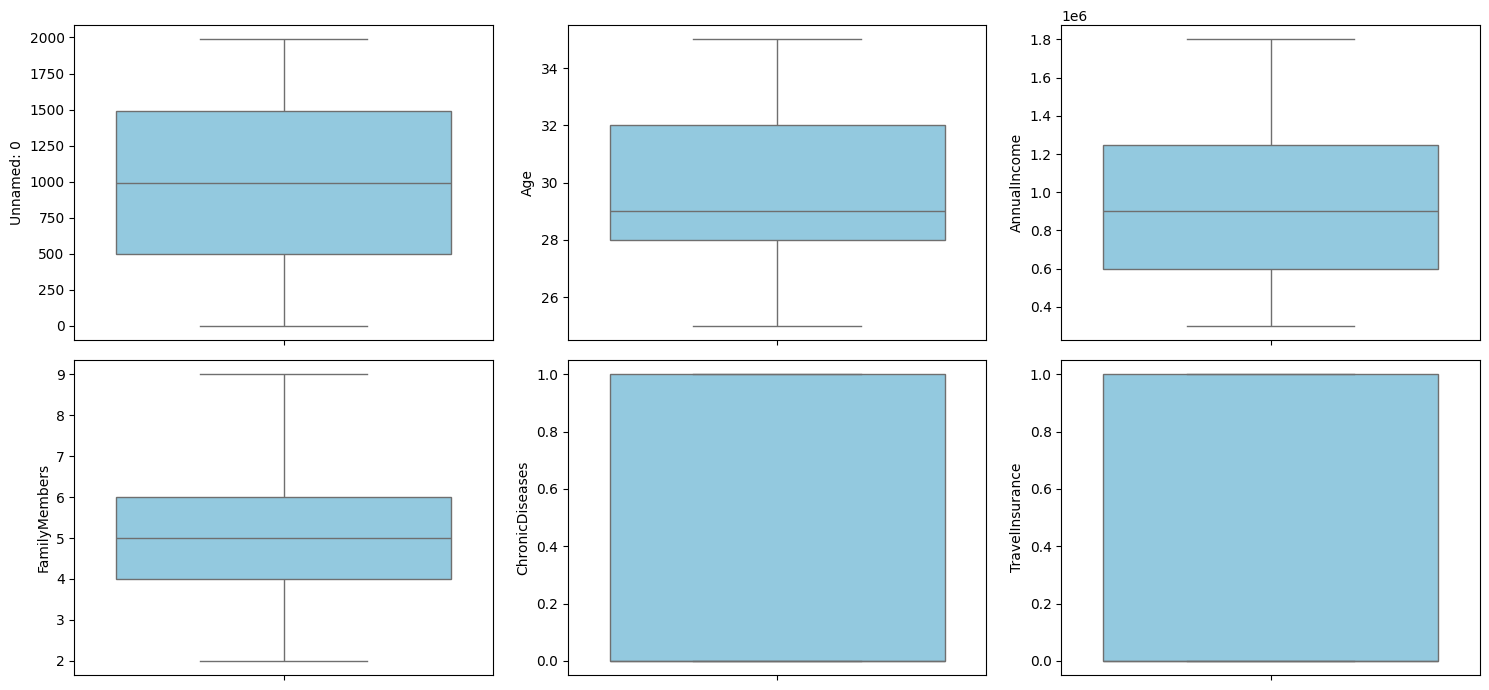

In [27]:
# Distribusi boxplot untuk fitur numerikal
plt.figure(figsize=(15,7))
numerical_columns = df.select_dtypes(include=['int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[column], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

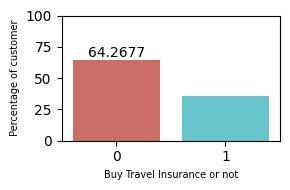

In [28]:
# Kalkulasi persentase dari TravelInsurance

insurance_percentage = df.groupby('TravelInsurance').size() / len(df) * 100

plt.figure(figsize=(3,2))
sns.barplot(insurance_percentage, palette="hls")
plt.ylabel('Percentage of customer', fontsize=7) # y axis label
plt.xlabel('Buy Travel Insurance or not', fontsize=7) # x axis label
plt.bar_label(plt.gca().containers[0])  # Add percentage labels on top of bars
plt.ylim(0, 100) # set y limit to 100
plt.tight_layout()

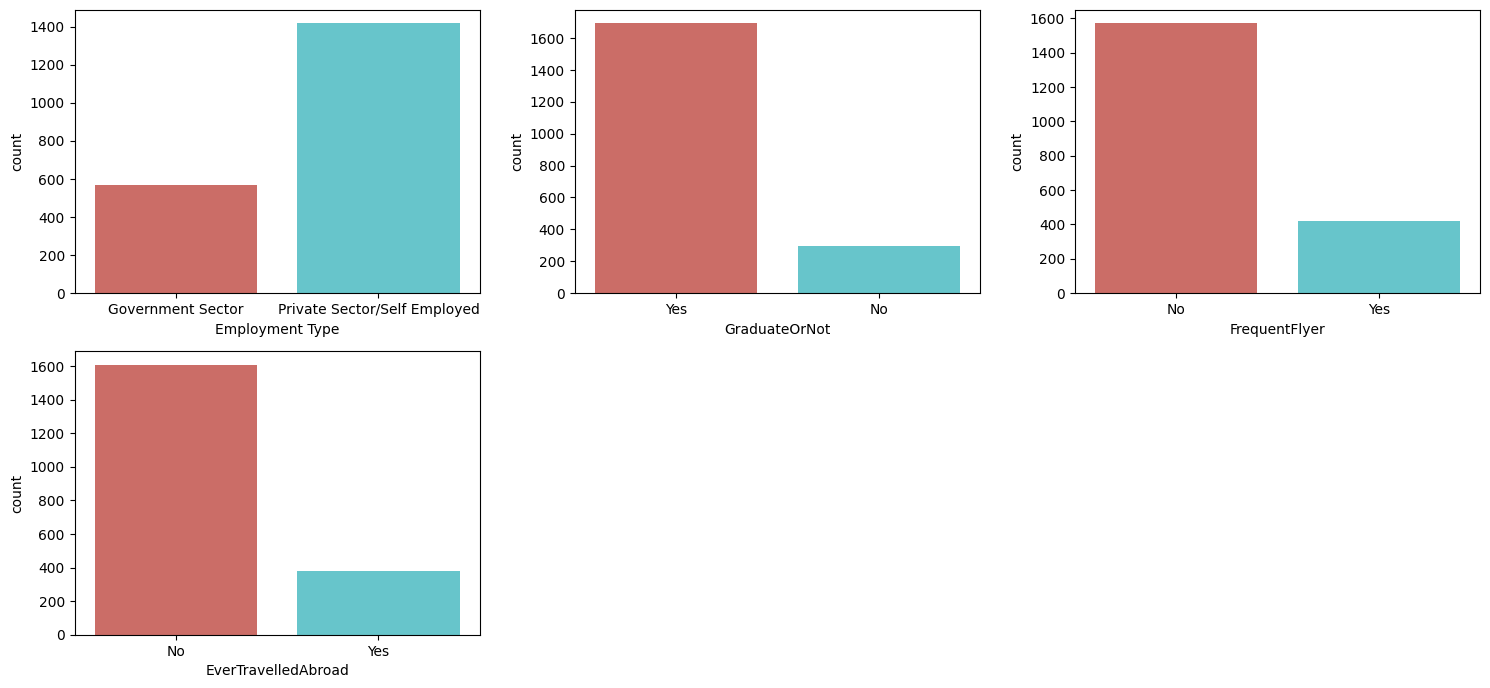

In [29]:
# Bar plot fitur kategorikal
plt.figure(figsize=(15,7))
for i, column in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette="hls")
plt.tight_layout()
plt.show()

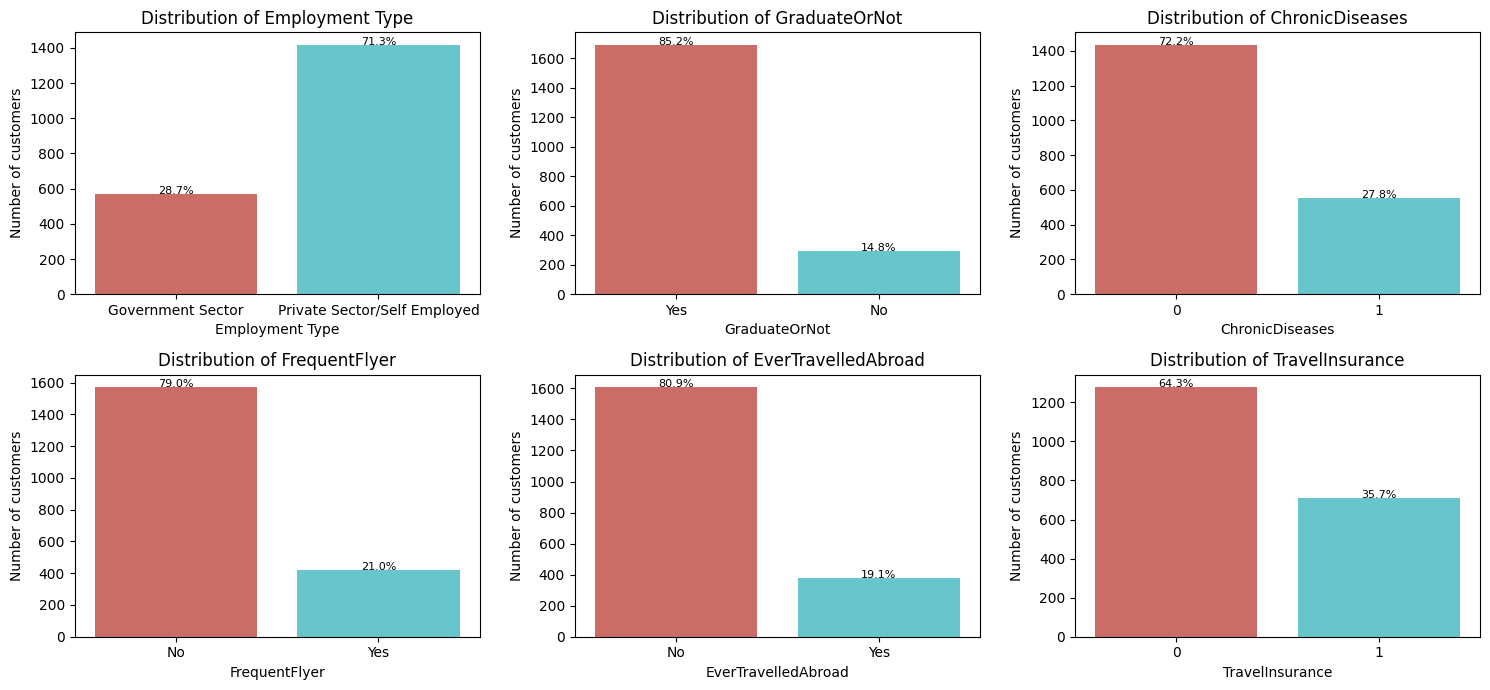

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


cat = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

plt.figure(figsize=(15, 7))

for i, column in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette="hls")

    # Calculate and display percentages on top of each bar
    total = len(df[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center', fontsize=8)

    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()


### Analisis Univariat Insight

A. Fitur Numerikal
* Distribusi umur bervariasi, dengan mean, median, dan modus yang mirip (29.650226, 29, dan 28)
* Distribusi annual income bervariasi namun merata, dengan mean = 932,763 dan median = 900,000
* Distribusi anggota keluarga cenderung positif (positively skewed), dengan rata-rata (median) 5 orang. Anggota keluarga yang paling banyak muncul adalah 4 orang. Tiap pelanggan memiliki setidaknya 2 orang anggota keluarga
* Lebih dari 60% pelanggan tidak membeli travel insurance
* Tidak ada outlier

B. Fitur Kategorikal
* Lebih dari 70% pelanggan adalah karyawan swasta dan wiraswasta
* Sekitar 85% pelanggan adalah lulusan perguruan tinggi
* 27.8% pelanggan mengidap penyakit kronis
* Hanya 21% pelanggan yang sering bepergian dengan pesawat
* Hanya 19% pelanggan yang pernah traveling keluar negeri

## Analisis Multivariat

In [31]:
# Mengubah kolom boolean ke numerical
df2 = df.copy()

def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

df2['GraduateOrNot'] = df2['GraduateOrNot'].apply(convert_yesno_to_binary)
df2['FrequentFlyer'] = df2['FrequentFlyer'].apply(convert_yesno_to_binary)
df2['EverTravelledAbroad'] = df2['EverTravelledAbroad'].apply(convert_yesno_to_binary)
df2['ChronicDiseases'] = df2['ChronicDiseases'].apply(convert_yesno_to_binary)

df2.head()

Unnamed: 0  Age               Employment Type  GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector              1        400000   
1           1   31  Private Sector/Self Employed              1       1250000   
2           2   34  Private Sector/Self Employed              1        500000   
3           3   28  Private Sector/Self Employed              1        700000   
4           4   28  Private Sector/Self Employed              1        700000   

   FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
0              6                0              0                    0   
1              7                0              0                    0   
2              4                0              0                    0   
3              3                0              0                    0   
4              8                0              1                    0   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

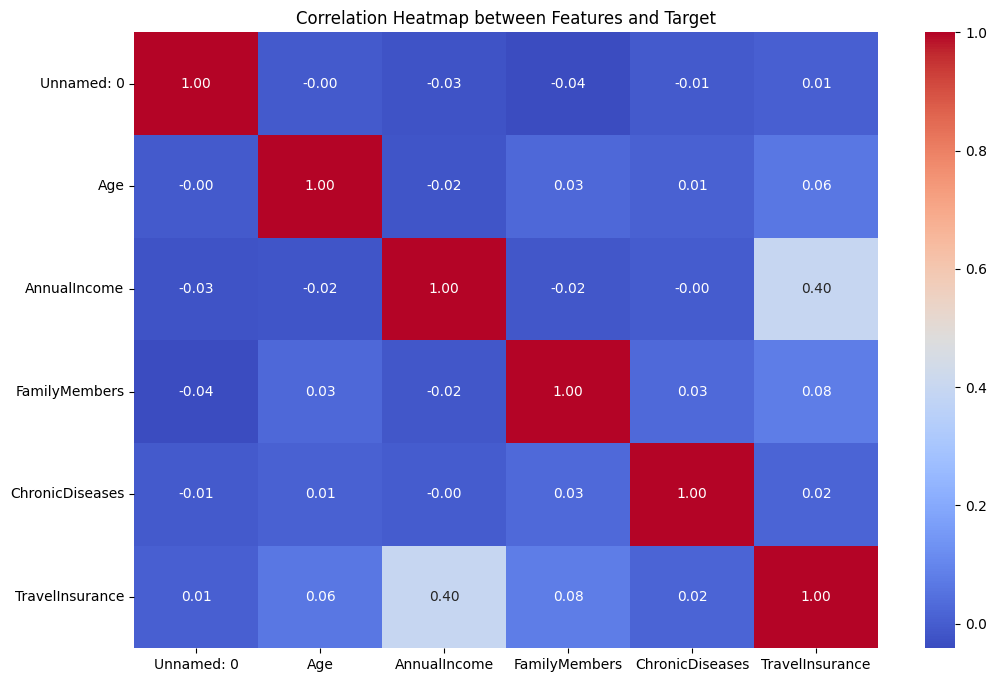

<Figure size 1500x1000 with 0 Axes>

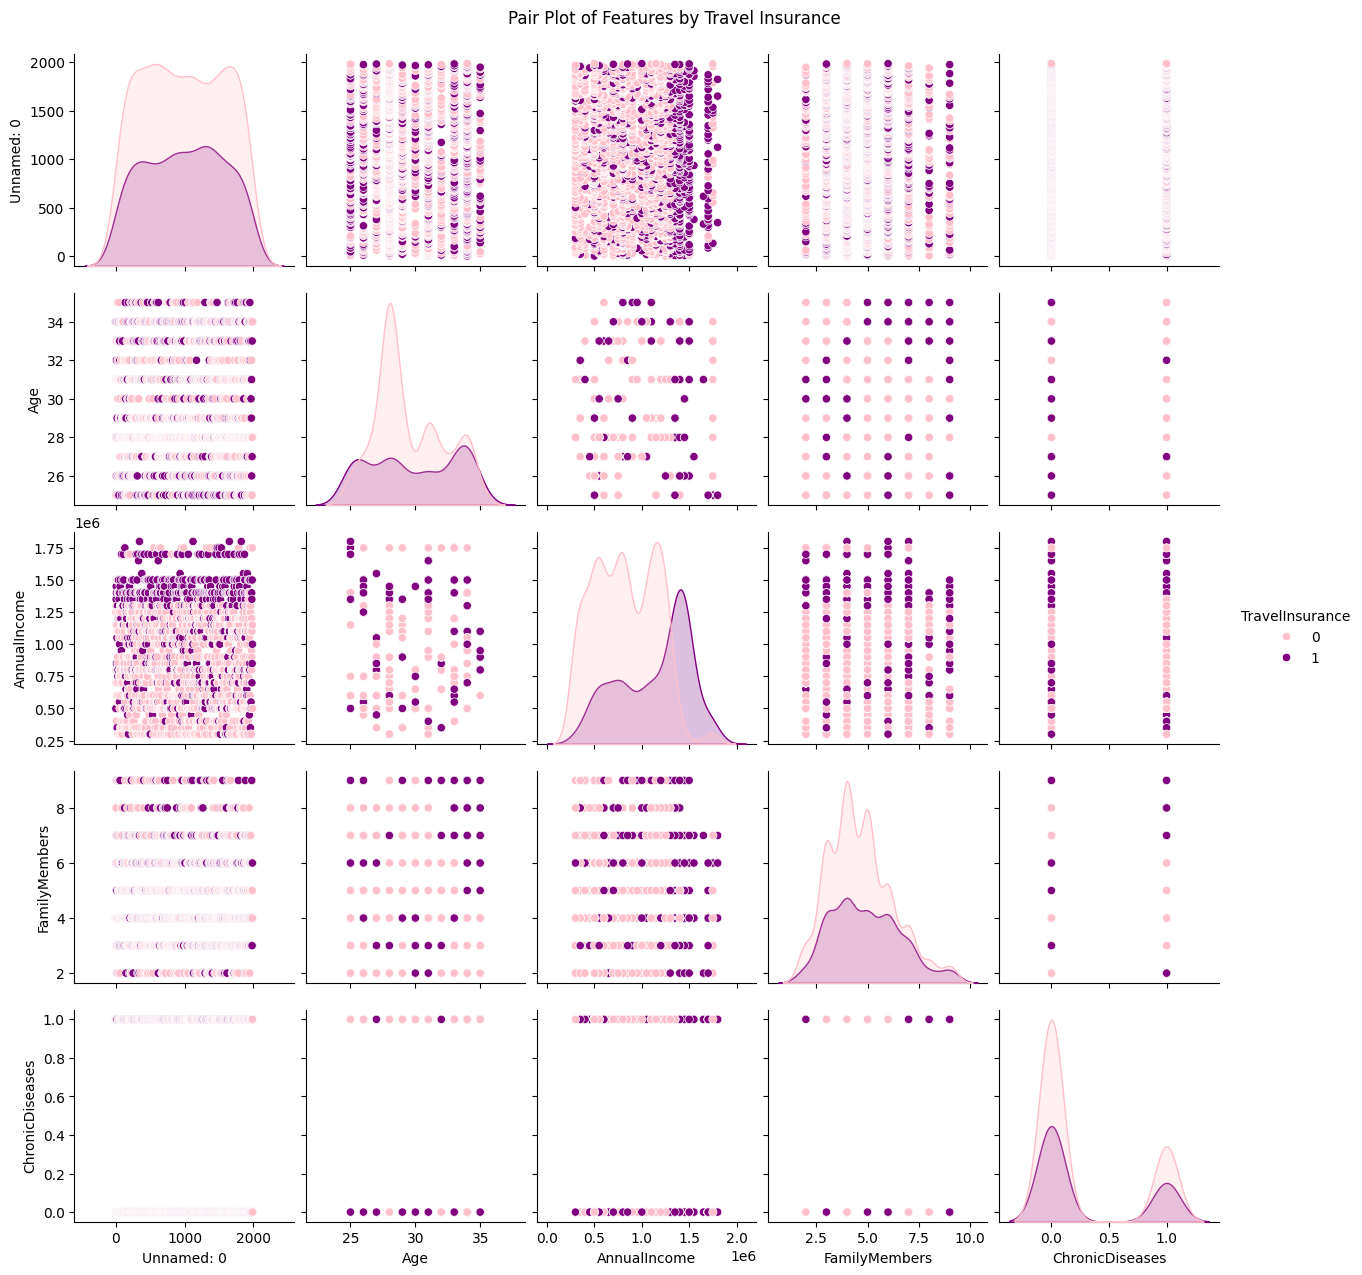

In [32]:
# A. Korelasi antara masing-masing feature dan label
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Target')
plt.show()

# B. Korelasi antar-feature
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='TravelInsurance', palette={0: 'pink', 1: 'purple'})
plt.suptitle('Pair Plot of Features by Travel Insurance', y=1.02)
plt.show()

<Axes: >

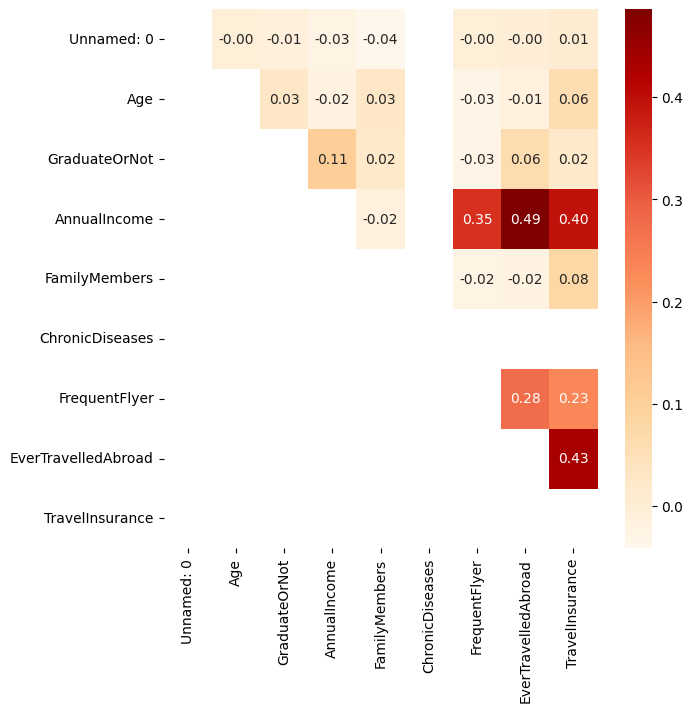

In [33]:
# Korelasi antar fitur numerikal
numericals2 = df2.select_dtypes(exclude='object')
num2 = numericals2.columns
corr = numericals2.corr()

mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

plt.figure(figsize=(7,7))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.2f')

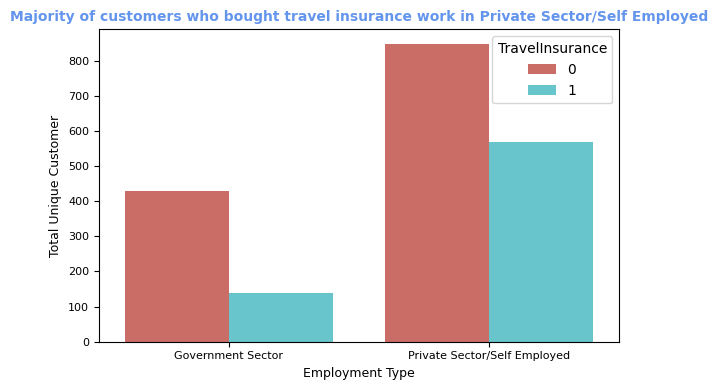

In [34]:
# Grafik antara Employment Type dengan target
plt.figure(figsize=(6,4))
sns.countplot(x='Employment Type', hue='TravelInsurance', data=df2, palette="hls")

plt.title('Majority of customers who bought travel insurance work in Private Sector/Self Employed',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Employment Type', fontsize=9) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 8);

plt.tight_layout()

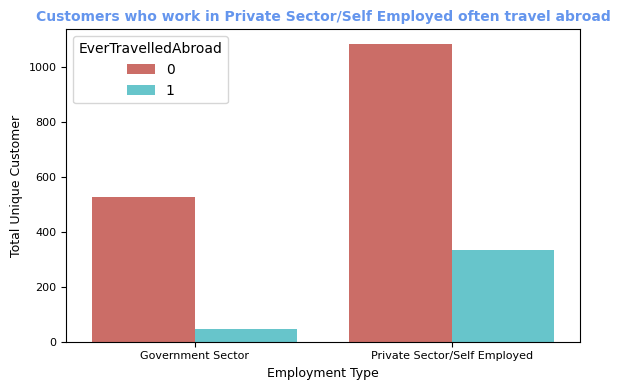

In [35]:
# Grafik antara Employment Type dengan EverTravelledAbroad
plt.figure(figsize=(6,4))
sns.countplot(x='Employment Type', hue='EverTravelledAbroad', data=df2, palette="hls")

plt.title('Customers who work in Private Sector/Self Employed often travel abroad',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Employment Type', fontsize=9) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 8);

plt.tight_layout()

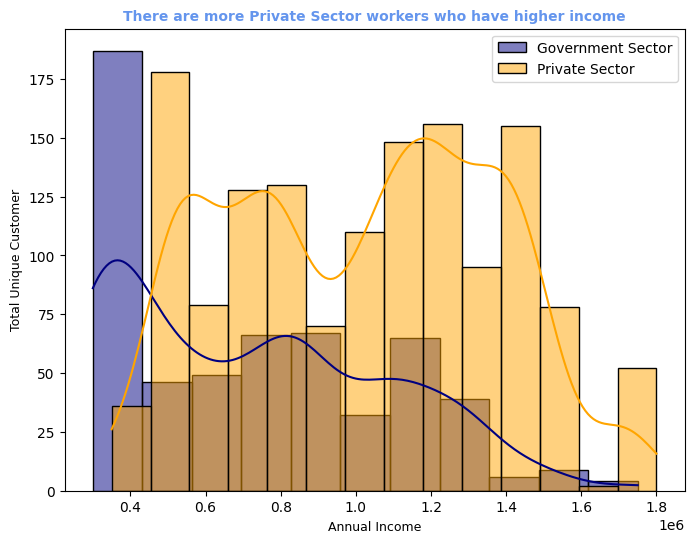

In [36]:
# Grafik antara Employment Type dengan Annual Income
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(df2[df2['Employment Type'] == 'Government Sector']['AnnualIncome'], color= 'navy', label= 'Government Sector', multiple="stack", kde=True)
sns.histplot(df2[df2['Employment Type'] == 'Private Sector/Self Employed']['AnnualIncome'], color= 'orange', label= 'Private Sector', multiple="stack", kde=True)

plt.title('There are more Private Sector workers who have higher income',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Annual Income', fontsize=9) # x axis label
plt.legend()

In [37]:
# Rata-rata Annual Income tiap Employment Type
df_employment = df2.groupby('Employment Type')['AnnualIncome'].median().reset_index()
df_employment.rename(columns = {'AnnualIncome' : 'Average Annual Income'}, inplace=True)
df_employment

Employment Type  Average Annual Income
0             Government Sector               700000.0
1  Private Sector/Self Employed              1050000.0

### Analisis Multivariat Insight

A. Korelasi antara Feature Numerik dan Target ('TravelInsurance'):

* Target memiliki korelasi positif paling tinggi dengan EverTravelledAbroad (0.43). Pelanggan yang pernah keluar negeri akan cenderung membeli travel insurance.
* Korelasi antara target dengan Annual Income cukup tinggi (0.4). Semakin tinggi pendapatan pelanggan, semakin besar kemungkinan pelanggan membeli travel insurance.
* Potensi pelanggan yang FrequentFlyer untuk untuk membeli Travel Insurance cukup potensial (0,23). Semakin sering berpergian pelanggan akan lebih memiliki kesadaran pentingnya memiliki sebuah Travel Insurance.

B. Korelasi antar Feature:

* Korelasi antara Annual Income dengan EverTravelledAbroad cukup tinggi (0.49), menunjukkan bahwa pelanggan dengan pendapatan yang tinggi pernah bepergian keluar negeri.
* Korelasi antara Annual Income dengan FrequentFlyer cukup tinggi (0.35), menunjukkan bahwa pelanggan dengan pendapatan yang tinggi sering bepergian dengan pesawat.

C. Korelasi antara Feature Kategorik dan Target ('TravelInsurance'):
Pelanggan yang bekerja di bidang swasta dan wiraswasta cenderung membeli travel insurance.

D. Korelasi antara Feature Kategorik dan Feature lainnya:
* Pelanggan yang pernah keluar negeri didominasi oleh karyawan swasta dan wiraswasta.
* Pelanggan yang bekerja di pemerintah kebanyakan memiliki pendapatan di bawah 400,000, semakin tinggi pendapatan semakin sedikit jumlah orangnya. Dapat dilihat juga rata-rata pendapatannya di bawah karyawan yang bekerja di sektor swasta. Sedangkan Pelanggan yang bekerja di sektor swasta memiliki rata-rata pendapatan lebih tinggi, dengan jumlah karyawan yang memiliki pendapatan di atas 450,000 lebih banyak.

## Business Insight

* Fokuskan strategi marketing pada pelanggan yang pernah bepergian ke luar negeri.
* Lakukan segmentasi pelanggan berdasarkan kategori pendapatan tahunan. Misalnya, tentukan rentang pendapatan rendah, menengah, dan tinggi. Sesuaikan penawaran dan premi travel insurance sesuai dengan segmentasi ini. Pelanggan dengan pendapatan lebih tinggi mungkin lebih bersedia untuk membayar premi yang lebih tinggi untuk manfaat tambahan. Berikan diskon atau insentif khusus kepada pelanggan dengan pendapatan tinggi.
* Tawarkan paket asuransi perjalanan premium dengan manfaat tambahan kepada pelanggan dengan pendapatan tinggi yang memiliki riwayat perjalanan internasional ('EverTravelledAbroad' = 'Yes') dan sering bepergian dengan pesawat ('FrequentFlyer' = 'Yes').
* Fokuskan strategi marketing kepada pelanggan yang bekerja di sektor swasta dan wiraswasta. Perusahaan dapat melakukan hal ini dengan memanfaatkan media-media yang diminati oleh segmen pasar tersebut, seperti media sosial atau komunitas online.
* Perusahaan dapat menawarkan paket asuransi perjalanan terbaru dengan harga yang lebih kompetitif untuk menarik minat pelanggan yang bekerja di sektor pemerintah.

# **Stage 2 - Hakuna Matata Data PreProcessing**

## Data Cleansing

### Handling Missing Value

In [38]:
# Cek nilai yang hilang
df2.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### Handling Duplicated Data

In [39]:
# Cek duplikasi
df2.duplicated().sum()

0

### Handling Outliers

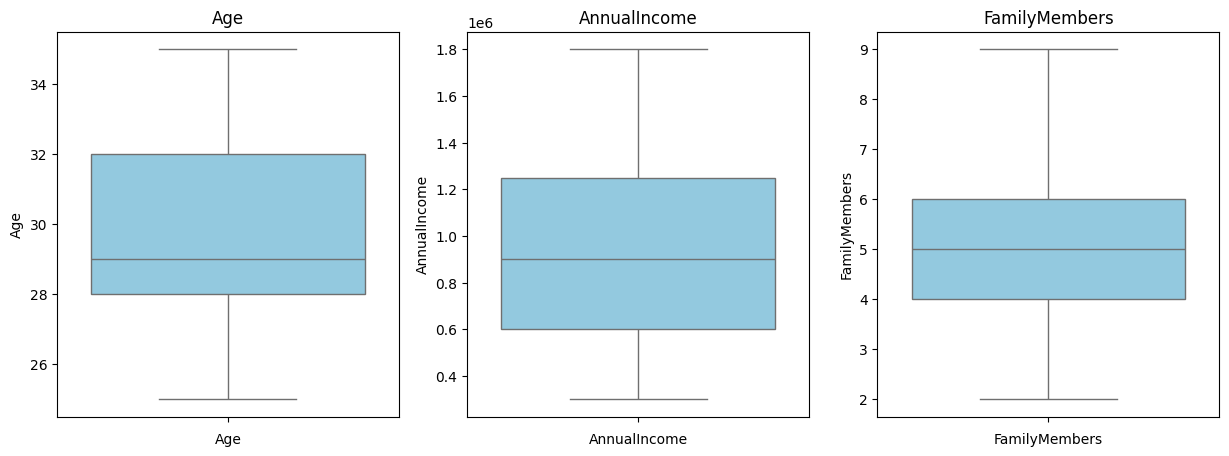

In [40]:
# Tentukan kolom yang ingin ditampilkan
columns_to_visualize = ['Age', 'AnnualIncome', 'FamilyMembers']

# Buat figure dan subplot
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df2[column], color='skyblue', orient='v')
    plt.title(f'{column}')
    plt.xlabel(column)


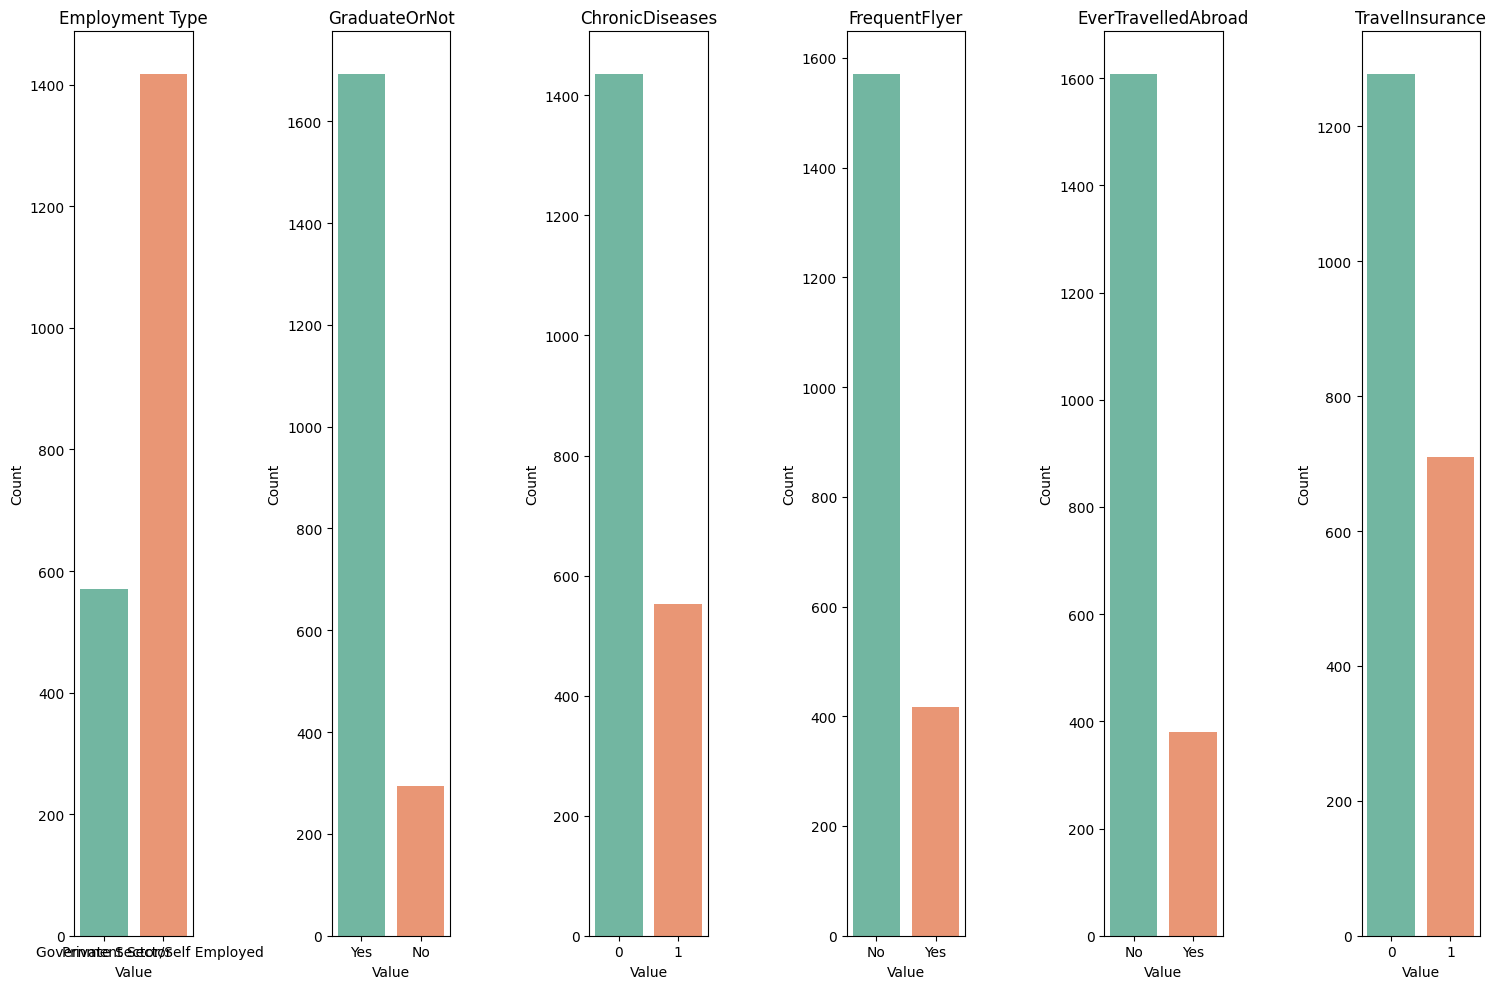

In [41]:
# Mendapatkan daftar kolom kategori
kolom_kategori = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
                  'EverTravelledAbroad', 'TravelInsurance']

# Buat subplot untuk menampilkan count plot
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kategori), figsize=(15, 10))

# Tampilkan count plot untuk setiap kolom
for i, column in enumerate(kolom_kategori):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [42]:
# Definisikan fungsi untuk mengetahui outlier dengan Z-score
def detect_outliers_z_score(df2, threshold=3):
    z_scores = np.abs((df2 - df2.mean()) / df2.std())
    return z_scores > threshold

# Definisikan fungsi untuk mengetahui outlier dengan (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return (df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))

# Aplikasi penilaian outlier
outliers_z_score = detect_outliers_z_score(df2)
outliers_iqr = detect_outliers_iqr(df2)

# Menampilkan outlier dengan mendeteksi Z-score
print("Outliers detected by Z-score:")
print(outliers_z_score.any())

# Menampilkan outlier dengan mendeteksi  IQR
print("\nOutliers detected by IQR:")
print(outliers_iqr.any())

Outliers detected by Z-score:
Age                    False
AnnualIncome           False
ChronicDiseases        False
Employment Type        False
EverTravelledAbroad    False
FamilyMembers          False
FrequentFlyer          False
GraduateOrNot          False
TravelInsurance        False
Unnamed: 0             False
dtype: bool

Outliers detected by IQR:
Age                    False
AnnualIncome           False
ChronicDiseases        False
Employment Type        False
EverTravelledAbroad    False
FamilyMembers          False
FrequentFlyer          False
GraduateOrNot          False
TravelInsurance        False
Unnamed: 0             False
dtype: bool


Setelah melihat Nilai Z-score dan IQR dan memvisualisasikan datanya dengan box_plot dan count_plot tidak didapatkan Outlier

### Feature Transformation


In [43]:
# Drop kolom yang tidak diperlukan 'unnamed:0'

df2 = df.copy()
df2 = df2.drop('Unnamed: 0', axis=1)

# Mengubah tipe data dari kolom 'ChronicDiseases' dari integer ke object
# df2['ChronicDiseases'] = df2['ChronicDiseases'].replace({0: 'No', 1: 'Yes'})

df2.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

### Feature encoding


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['GraduateOrNot']=le.fit_transform(df2['GraduateOrNot'])

In [45]:
le = LabelEncoder()
df2['FrequentFlyer']=le.fit_transform(df2['FrequentFlyer'])

In [46]:
le = LabelEncoder()
df2['EverTravelledAbroad']=le.fit_transform(df2['EverTravelledAbroad'])

In [47]:
df2['Employment Type'] = df2['Employment Type'].replace({'Private Sector/Self Employed': 0 , 'Government Sector': 1})

In [48]:
df2.head(3)

Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31                1              1        400000              6   
1   31                0              1       1250000              7   
2   34                0              1        500000              4   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  
0                1              0                    0                0  
1                0              0                    0                0  
2                1              0                    0                1

Di sini kami melakukan Encoding menggunakan motode Label Encoding dikarenakan value pada kolom-kolom di atas memiliki value bertipe object yang bersifat biner.

### Handle class imbalance


In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df2.drop('TravelInsurance', axis=1)
y = df2['TravelInsurance']

In [50]:
#split data Train test sebelum cek class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
y_train.value_counts()

0    1020
1     569
Name: TravelInsurance, dtype: int64

<Axes: ylabel='TravelInsurance'>

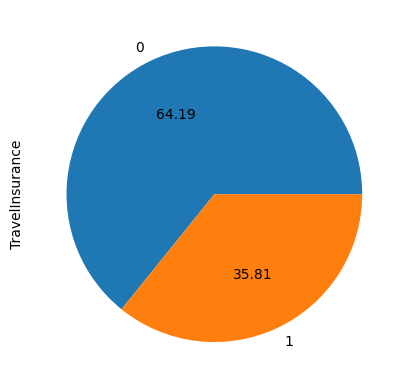

In [52]:
y_train.value_counts().plot.pie(autopct='%.2f')

Dapat kita lihat dan kita simpulkan dari Pie Chart di atas bahwa dataset memiliki class imbalance sehingga kita perlu melakukan oversampling pada data train agar tidak terjadi bias dan kecenderungan model mempelari pola dari data mayoritas (orang yang tidak membeli Travel Insurance)

In [53]:
# Over Sampling menggunakan smote

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Di sini kami melakukan balancing class dengan metode oversampling menggunakan SMOTE (Synthetic Minority Over-sampling Technique) dengan alasan dibandingkan dengan metode oversampling yang sederhana seperti duplikasi atau pengulangan sampel minoritas, SMOTE mencegah overfitting karena menghasilkan variasi tambahan dalam dataset tanpa hanya menyalin sampel-sampel yang sudah ada.

In [54]:
y_train_resampled.value_counts()

1    1020
0    1020
Name: TravelInsurance, dtype: int64

<Axes: ylabel='TravelInsurance'>

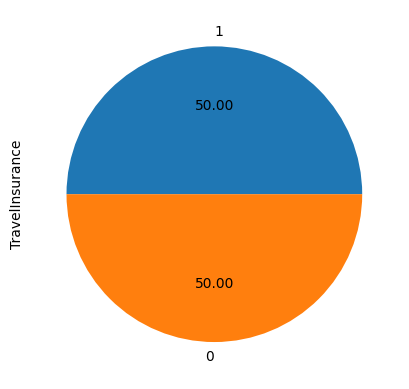

In [55]:
y_train_resampled.value_counts().plot.pie(autopct='%.2f')

Dapat kita lihat sekarang data train kita memiliki nilai kelas yang seimbang (balanced class) dengan menggunakan metode oversampling di atas. Dengan ini model bisa mempelajari kedua pola dari masing-masing kelas secara seimbang dan diharapkan dapat menghasilkan prediksi yang lebih akurat.

## Feature Engineering

### Feature Selection

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
# Memisahkan fitur dan target
X = df2.drop('TravelInsurance', axis=1)
y = df2['TravelInsurance']

In [58]:
# Inisialisasi model untuk RFE
model = LogisticRegression()

In [59]:
# Inisialisasi RFE dengan model dan jumlah fitur yang ingin dipilih
rfe = RFE(model, n_features_to_select=5)

In [60]:
# Melatih RFE pada data
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [61]:
# Mengambil indeks fitur terpilih
selected_features = rfe.support_

In [62]:
# Mengambil nama fitur terpilih
selected_feature_names = X.columns[selected_features]

In [63]:
# Menampilkan fitur terpilih
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'EverTravelledAbroad'],
      dtype='object')


Dari hasil analisis yang telah dilakukan sebelumnya, tidak ada fitur yang tampak redundan atau kurang relevan. Namun, dari hasil pemodelan dengan menggunakan Recursive Feature Elimination (RFE) menggunakan model Logistic Regression, fitur-fitur terpilih untuk memprediksi apakah seorang pelanggan akan membeli paket asuransi perjalanan adalah sebagai berikut:

1. Usia (Age)
2. Apakah pelanggan lulusan perguruan tinggi atau tidak (GraduateOrNot)
3. Pendapatan tahunan pelanggan (AnnualIncome)
4. Jumlah anggota keluarga (FamilyMembers)
5. Apakah pelanggan pernah bepergian keluar negeri atau tidak (EverTravelledAbroad)

Kelima fitur ini dipilih karena dianggap memiliki kontribusi paling signifikan dalam memprediksi keputusan pembelian asuransi perjalanan oleh pelanggan.





### Feature Extraction

In [ ]:
df_extract = df.copy()

In [ ]:
df_extract.head(2)

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   

   TravelInsurance  
0                0  
1                0

In [ ]:
df_extract.describe()

Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

**Age :**
min = 25 years old, max = 35 years old  
  
**AnnualIncome :**  
min = 300,000; max = 1,800,000

#### Age Group

In [ ]:
bins = [25,28,31,35]
labels = ['Young', 'Middle-aged', 'Senior']
df_extract['Age-group'] = pd.cut(df_extract['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df_extract['Age-group'].value_counts()

Middle-aged    763
Senior         739
Young          425
Name: Age-group, dtype: int64

In [ ]:
df_extract[['Age', 'Age-group']].head()

Age    Age-group
0   31       Senior
1   31       Senior
2   34       Senior
3   28  Middle-aged
4   28  Middle-aged

#### Income Level

In [ ]:
bins = [300000, 675000, 1050000, 1425000, 1800000]
labels = ['Low', 'Medium', 'High', 'Very High']
df_extract['Income Level'] = pd.cut(df_extract['AnnualIncome'],bins=bins, labels=labels, right=False)

In [ ]:
df_extract['Income Level'].value_counts()

High         715
Low          575
Medium       521
Very High    172
Name: Income Level, dtype: int64

In [ ]:
df_extract[['AnnualIncome', 'Income Level']].head()

AnnualIncome Income Level
0        400000          Low
1       1250000         High
2        500000          Low
3        700000       Medium
4        700000       Medium

In [ ]:
df_extract['AnnualIncome'].nunique()

30

In [ ]:
df_extract['Income Level'].nunique()

4

In [ ]:
df_extract['Age'].nunique()

11

In [ ]:
df_extract['Age-group'].nunique()

3

Travel Experience

In [ ]:
# Create column TravelExperience based on FrequentFlyer and EverTravelledAbroad

df2['TravelExperience'] = np.where((df2['FrequentFlyer'] == 1) & (df2['EverTravelledAbroad'] == 1), 3,
                                 np.where((df2['FrequentFlyer'] == 0) & (df2['EverTravelledAbroad'] == 1), 2,
                                          np.where((df2['FrequentFlyer'] == 1) & (df2['EverTravelledAbroad'] == 0), 1,
                                        0))
                                 )
df2.head(5)

Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31                1              1        400000              6   
1   31                0              1       1250000              7   
2   34                0              1        500000              4   
3   28                0              1        700000              3   
4   28                0              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

   TravelExperience  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1

In [ ]:
df2['TravelExperience'].value_counts()

0    1358
1     249
2     212
3     168
Name: TravelExperience, dtype: int64

Family Size

In [ ]:
# Create column FamilySize based on FamilyMembers

df2['FamilySize'] = np.where(df2['FamilyMembers'] <= 3, 0,
                            np.where(df2['FamilyMembers'] <= 5, 1,
                                    2)
                           )
df2.head(3)

Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31                1              1        400000              6   
1   31                0              1       1250000              7   
2   34                0              1        500000              4   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   

   TravelExperience  FamilySize  
0                 0           2  
1                 0           2  
2                 0           1

In [ ]:
df2['FamilySize'].value_counts()

1    931
2    586
0    470
Name: FamilySize, dtype: int64

In [ ]:
# Check the correlation of new features

# drop old features first
df_new = df2.copy()

df_new = df_new.drop(['FamilyMembers', 'FrequentFlyer', 'EverTravelledAbroad'], axis=1)

corr = df_new.corr()
corr

Age  Employment Type  GraduateOrNot  AnnualIncome  \
Age               1.000000         0.115134       0.027125     -0.020101   
Employment Type   0.115134         1.000000       0.127133     -0.349157   
GraduateOrNot     0.027125         0.127133       1.000000      0.108066   
AnnualIncome     -0.020101        -0.349157       0.108066      1.000000   
ChronicDiseases   0.007359         0.011553       0.018811     -0.001149   
TravelInsurance   0.061060        -0.147847       0.018934      0.396763   
TravelExperience -0.024013        -0.204912       0.038591      0.536329   
FamilySize        0.024866         0.004171       0.021859     -0.007538   

                  ChronicDiseases  TravelInsurance  TravelExperience  \
Age                      0.007359         0.061060         -0.024013   
Employment Type          0.011553        -0.147847         -0.204912   
GraduateOrNot            0.018811         0.018934          0.038591   
AnnualIncome            -0.001149         0.396763          0.536329   
ChronicDiseases          1.000000         0.018190         -0.001120   
TravelInsurance          0.018190         1.000000          0.443716   
TravelExperience        -0.001120         0.443716          1.000000   
FamilySize               0.027483         0.077393         -0.029452   

                  FamilySize  
Age                 0.024866  
Employment Type     0.004171  
GraduateOrNot       0.021859  
AnnualIncome       -0.007538  
ChronicDiseases     0.027483  
TravelInsurance     0.077393  
TravelExperience   -0.029452  
FamilySize          1.000000

Alasan untuk menambah Feature Extraction (Age Group & Income Level) :
- Mempermudah pemahaman stakeholder
- Mengurangi jumlah unique value.   
  
Tanpa kategorisasi:
- nunique value age = 11
- nunique value Annual Income = 30  

Dengan kategorisasi :
- nunique value Age-group = 3
- nunique value Income Level = 4

Travel Experience
- TravelExperience bisa dijadikan sebagai feature baru untuk menggantikan FrequentFlyer dan EverTravelledAbroad karena korelasinya dengan target lebih tinggi, dan lebih simpel karena hanya butuh 1 kolom saja dibandingkan 2 kolom.
- FamilyMembers tidak perlu diganti dengan FamilySize karena korelasi FamilySize justru lebih rendah.

### 4 Feature Tambahan

1. Travel Experience

TravelExperience bisa dijadikan sebagai feature baru untuk menggantikan FrequentFlyer dan EverTravelledAbroad karena korelasinya dengan target lebih tinggi, dan lebih simpel karena hanya butuh 1 kolom saja dibandingkan 2 kolom.

2. Riwayat Kesehatan

Jika tersedia, informasi tentang riwayat kesehatan pelanggan seperti riwayat penyakit atau cedera dapat menjadi indikator penting untuk menilai risiko dan kebutuhan asuransi perjalanan.

3. Riwayat Klaim

Memasukkan informasi tentang riwayat klaim sebelumnya dari pelanggan dapat membantu dalam mengevaluasi risiko dan kecenderungan untuk membeli asuransi. Pelanggan yang memiliki riwayat klaim sebelumnya mungkin lebih cenderung membeli asuransi lagi di masa depan.

4. Aktivitas Wisata

Menambahkan informasi tentang aktivitas wisata yang diinginkan oleh pelanggan (misalnya, olahraga ekstrem, pemandian mata air panas, atau perjalanan petualangan) dapat membantu dalam menyesuaikan jenis dan tingkat perlindungan yang ditawarkan.

**Terima Kasih**